In [1]:
from pkg_req import *
from construction import *
from solver import *
from backend import *
from pulses import *
from fidelity import *
from initialization import *
from qiskit.visualization import plot_histogram

# Hadamard-like pulse on $\ket{q_0}$

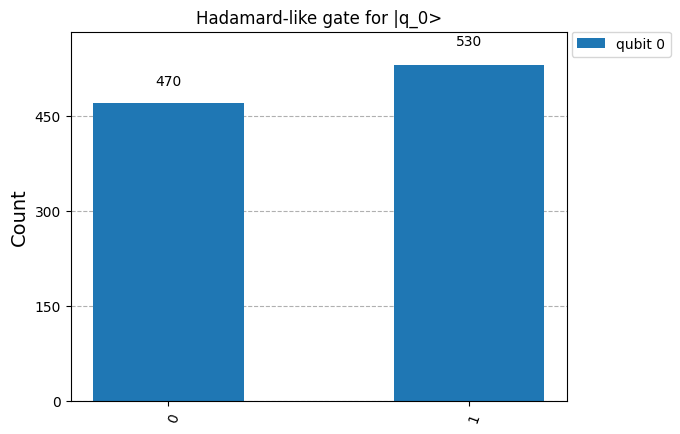

In [2]:
gauss1_sig1000=pulse.library.Gaussian(duration=3000, amp=1, sigma=500, angle=0)

schedules = []

with pulse.build(backend=backend) as schedule:
    with pulse.align_sequential(): #arranges pulse schedules to be executed sequentially in time to avoid overlap. This helps
# avoid overlap which can cause issues with coherence and unintended compilation coupling
        pulse.play(gauss1_sig1000, pulse.DriveChannel(0)) #transmit signal to qubits
        #pulse.play(gauss1_sig1000, pulse.DriveChannel(1))
        pulse.acquire(duration=100, qubit_or_channel=0, register=pulse.MemorySlot(0)) ##Use this to measure end state
        #pulse.measure_all()
schedules.append(schedule)
job = backend.run(schedules, shots=1000)
result = job.result()
counts0=result.get_counts()

plot_histogram(counts0,legend=['qubit 0'],title="Hadamard-like gate for |q_0>")

# Hadamard-like pulse on $\ket{q_1}$

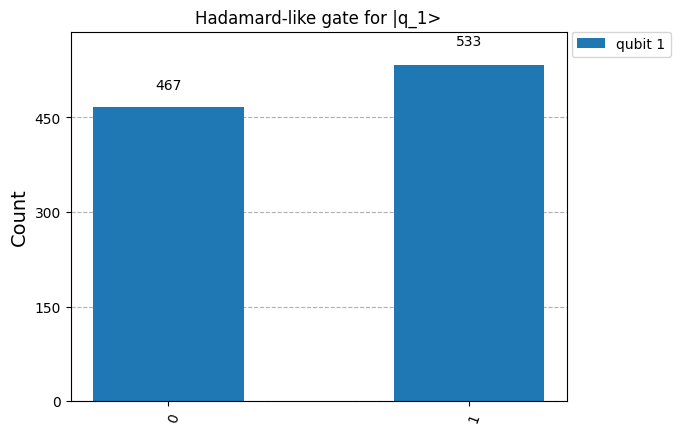

In [3]:
gauss01_1=pulse.library.Gaussian(duration=3000, amp=1, sigma=550, angle=0)
schedules = []

with pulse.build(backend=backend) as schedule:
    with pulse.align_sequential(): #arranges pulse schedules to be executed sequentially in time to avoid overlap. This helps
        pulse.play(gauss01_1, pulse.DriveChannel(1))
        pulse.acquire(duration=100, qubit_or_channel=1, register=pulse.MemorySlot(0)) ##Use this to measure end state
        #pulse.measure_all()
schedules.append(schedule)
job = backend.run(schedules, shots=1000)
result = job.result()
counts0=result.get_counts()

plot_histogram(counts0,legend=['qubit 1'],title="Hadamard-like gate for |q_1>")

# Hadamards from above on both $\ket{q_0}$ and $\ket{q_1}$:

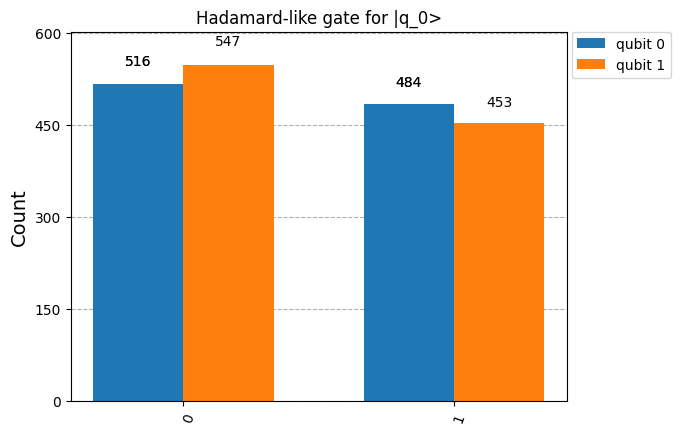

In [4]:
gauss0=pulse.library.Gaussian(duration=3000, amp=1, sigma=500, angle=0)
gauss1=pulse.library.Gaussian(duration=3000, amp=1, sigma=550, angle=0)

for i in [0,1]:
    schedules = []
    if i==0:
        with pulse.build(backend=backend) as schedule:
            with pulse.align_sequential():
                pulse.play(gauss0, pulse.DriveChannel(0))
                pulse.acquire(duration=100, qubit_or_channel=0, register=pulse.MemorySlot(0)) ##Use this to measure end state
                pulse.play(gauss1, pulse.DriveChannel(1))
        schedules.append(schedule)
        job = backend.run(schedules, shots=1000)
        result = job.result()
        counts0=result.get_counts()
    if i==1:
        with pulse.build(backend=backend) as schedule:
            with pulse.align_sequential(): 
                pulse.play(gauss0, pulse.DriveChannel(0))
                pulse.play(gauss1, pulse.DriveChannel(1))
                pulse.acquire(duration=100, qubit_or_channel=1, register=pulse.MemorySlot(0)) 
        schedules.append(schedule)
        job = backend.run(schedules, shots=1000)
        result = job.result()
        counts1=result.get_counts()
plot_histogram([counts0,counts1],legend=['qubit 0', 'qubit 1'],title="Hadamard-like gate for |q_0>")

# A CR-like pulse:

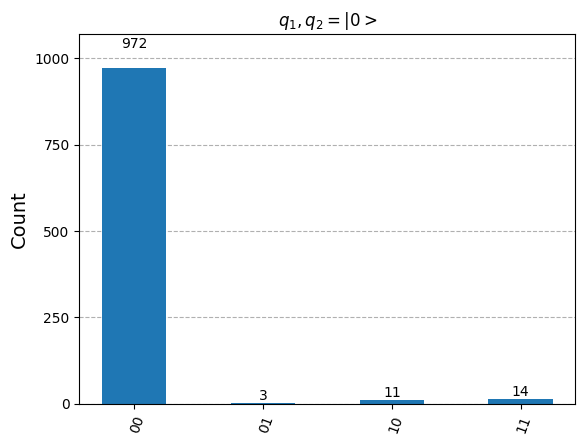

In [31]:
dur_CR=1000
sigma_CR=1000
angle_CR=0
amp=1
width_CR=50
dat=[]
g=gauss_CR(dur_CR, amp, sigma_CR, angle_CR, width_CR)
schedules = []

with pulse.build(backend=backend) as schedule:
    with pulse.align_sequential():
        pulse.play(g, pulse.ControlChannel(0))
        #pulse.play(g, pulse.DriveChannel(0))
        #pulse.shift_phase(np.pi/2, pulse.DriveChannel(0))
        pulse.measure_all()
schedules.append(schedule)
job = backend.run(schedules, shots=1000)
result = job.result()
counts=result.get_counts()
dat.append(counts)
plot_histogram(dat,title="$q_1,q_2=|0>$")

# Now if we consider the following circuit:

 |1> --------CR----- $\rightarrow\ket{?}$                
 |1> --------CR----- $\rightarrow\ket{?}$

- Would expect that there is a mixture between $\ket{11}$ and $\ket{01}$ will be the expected states to contain nearly all counts. Depending on duration or pulse strength, 1 of these may be completely populated

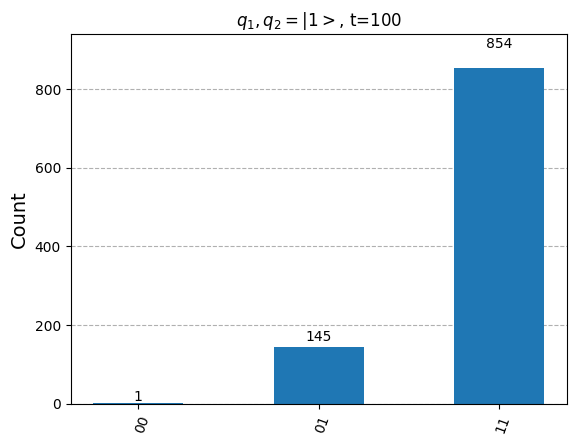

In [32]:
dur_CR=100
sigma_CR=1000
angle_CR=0
amp=1
width_CR=1
dat=[]
g=gauss_CR(dur_CR, amp, sigma_CR, angle_CR, width_CR)
schedules = []

with pulse.build(backend=backend) as schedule:
    with pulse.align_sequential():
        Ry11()
        pulse.play(g, pulse.ControlChannel(0))
        pulse.measure_all()
schedules.append(schedule)
job = backend.run(schedules, shots=1000)
result = job.result()
counts=result.get_counts()
dat.append(counts)
plot_histogram(dat,title="$q_1,q_2=|1>$, t=100")

# Now if we consider the following circuit:

 |0> --------CR----- $\rightarrow\ket{?}$                
 |1> --------CR----- $\rightarrow\ket{?}$

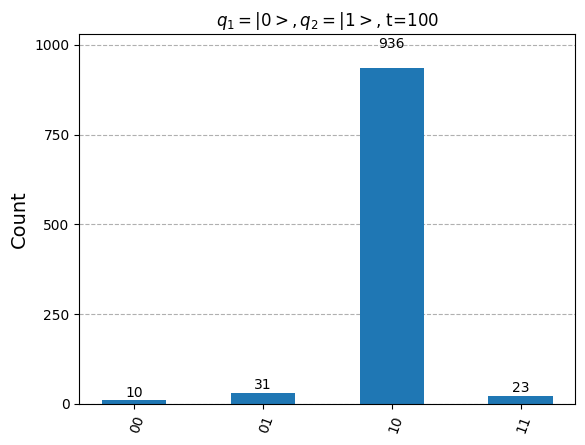

In [26]:
dur_CR=3000
sigma_CR=1000
angle_CR=0
amp=1
width_CR=1
dat=[]
g=gauss_CR(dur_CR, amp, sigma_CR, angle_CR, width_CR)
schedules = []
with pulse.build(backend=backend) as schedule:
    with pulse.align_sequential():
        Ry01()
        pulse.play(g, pulse.ControlChannel(0))
        pulse.measure_all()
schedules.append(schedule)
job = backend.run(schedules, shots=1000)
result = job.result()
counts=result.get_counts()
dat.append(counts)
plot_histogram(dat,title="$q_1=|0>,q_2=|1>$, t=100")

# Now if we consider the following circuit:

 |1> --------CR----- $\rightarrow\ket{?}$                
 |0> --------CR----- $\rightarrow\ket{?}$

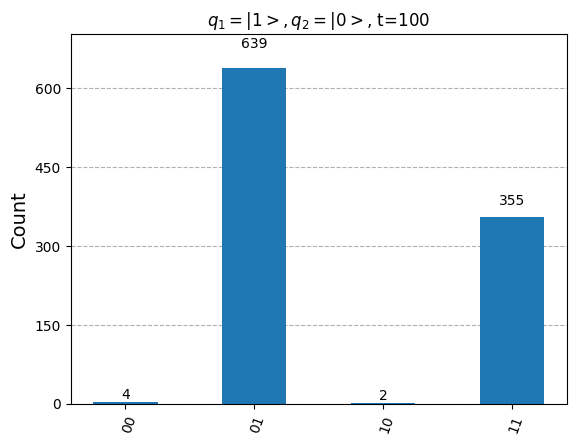

In [28]:
dur_CR=100
sigma_CR=100
angle_CR=0
amp=1
width_CR=1
dat=[]
g=gauss_CR(dur_CR, amp, sigma_CR, angle_CR, width_CR)
schedules = []
with pulse.build(backend=backend) as schedule:
    with pulse.align_sequential():
        Ry10()
        pulse.play(g, pulse.ControlChannel(0))
        pulse.measure_all()
schedules.append(schedule)
job = backend.run(schedules, shots=1000)
result = job.result()
counts=result.get_counts()
dat.append(counts)
plot_histogram(dat,title="$q_1=|1>,q_2=|0>$, t=100")

# **Aside workings below, disregard**

 |1> --H-----CR----- $\rightarrow\ket{?}$                
 |0> --------CR----- $\rightarrow\ket{?}$

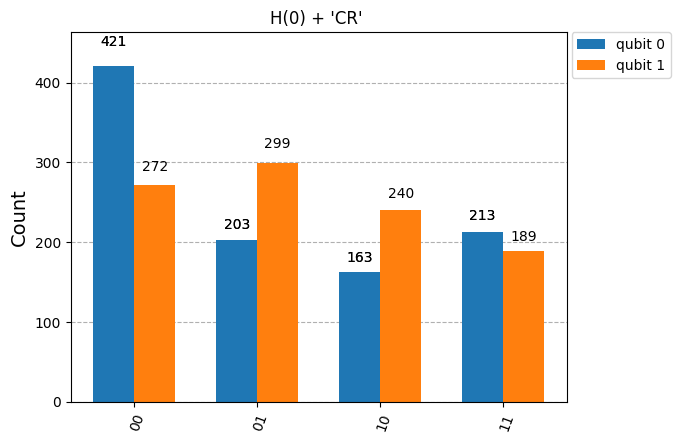

In [34]:
#Not correct

dur_CR=2000
sigma_CR=30
angle_CR=0
amp=1
width_CR=3
dat=[]
g=gauss_CR(dur_CR, amp, sigma_CR, angle_CR, width_CR)
for i in [0,1]:
    schedules = []
    if i==0:
        with pulse.build(backend=backend) as schedule:
            with pulse.align_sequential():
                Ry10()
                pulse.play(gauss01_1, pulse.DriveChannel(1))
                pulse.play(gauss1_sig1000, pulse.DriveChannel(0)) #transmit signal to qubits
                #pulse.play(gauss1_sig1000, pulse.DriveChannel(1))
                pulse.play(g, pulse.ControlChannel(0))
                #pulse.play(g, pulse.DriveChannel(0))
                #pulse.acquire(duration=100, qubit_or_channel=0, register=pulse.MemorySlot(1)) ##Use this to measure end state
                pulse.measure_all()
        schedules.append(schedule)
        job = backend.run(schedules, shots=1000)
        result = job.result()
        counts0=result.get_counts()
    if i==1:
        with pulse.build(backend=backend) as schedule:
            with pulse.align_sequential(): 
                pulse.play(gauss1_sig1000, pulse.DriveChannel(0)) #transmit signal to qubits
                #pulse.play(gauss1_sig1000, pulse.DriveChannel(1))
                pulse.play(g, pulse.ControlChannel(1))
                #pulse.play(g, pulse.DriveChannel(0))
                #pulse.acquire(duration=100, qubit_or_channel=1, register=pulse.MemorySlot(1)) ##Use this to measure end state
                pulse.measure_all()
        schedules.append(schedule)
        job = backend.run(schedules, shots=1000)
        result = job.result()
        counts1=result.get_counts()
plot_histogram([counts0,counts1],legend=['qubit 0', 'qubit 1'],title="H(0) + 'CR' ")

# Spanning the parameter space to try and minimize coutns in $\ket{01}$ and $\ket{10}$:

In [12]:
dur_CR=2000
#sigma_CR=30
angle_CR=0
#amp=1
#width_CR=3
#dat=[]

for sigma_CR in np.linspace(1,5000,20):
    for amp in np.linspace(0.1,1,5):
        for width_CR in np.linspace(1,10,20):
            #print(sigma_CR,amp,width_CR)
            g=gauss_CR(dur_CR, amp, sigma_CR, angle_CR, width_CR)
            for i in [0,1]:
                schedules = []
                if i==0:
                    with pulse.build(backend=backend) as schedule:
                        with pulse.align_sequential():
                            pulse.play(gauss1_sig1000, pulse.DriveChannel(0)) #transmit signal to qubits
                            #pulse.play(gauss1_sig1000, pulse.DriveChannel(1))
                            pulse.play(g, pulse.ControlChannel(0))
                            #pulse.play(g, pulse.DriveChannel(0))
                            #pulse.acquire(duration=100, qubit_or_channel=0, register=pulse.MemorySlot(1)) ##Use this to measure end state
                            pulse.measure_all()
                    schedules.append(schedule)
                    job = backend.run(schedules, shots=1000)
                    result = job.result()
                    counts0=result.get_counts()
                if i==1:
                    with pulse.build(backend=backend) as schedule:
                        with pulse.align_sequential(): 
                            pulse.play(gauss1_sig1000, pulse.DriveChannel(0)) #transmit signal to qubits
                            #pulse.play(gauss1_sig1000, pulse.DriveChannel(1))
                            pulse.play(g, pulse.ControlChannel(0))
                            #pulse.play(g, pulse.DriveChannel(0))
                            #pulse.acquire(duration=100, qubit_or_channel=1, register=pulse.MemorySlot(1)) ##Use this to measure end state
                            pulse.measure_all()
                    schedules.append(schedule)
                    job = backend.run(schedules, shots=1000)
                    result = job.result()
                    counts1=result.get_counts()
            required_keys = ['00', '01', '10', '11']
            for key in required_keys:
                counts0.setdefault(key, 0)
            counts00 = {'00': int(counts0['00']), '01': int(counts0['01']), '10': int(counts0['10']), '11': int(counts0['11'])}
            for key in required_keys:
                counts1.setdefault(key, 0)
            counts11 = {'00': int(counts0['00']), '01': int(counts0['01']), '10': int(counts0['10']), '11': int(counts0['11'])}        
            if int(counts00['10'])<100 and int(counts00['01'])<100 and int(counts11['10'])<100 and int(counts11['01'])<100:
                print(sigma_CR,amp,width_CR)
#plot_histogram([counts0,counts1],legend=['qubit 0', 'qubit 1'],title="H(0) + 'CR' ")

KeyboardInterrupt: 

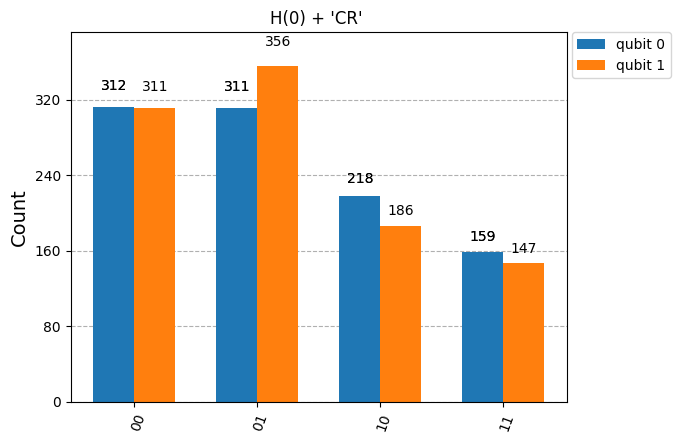

In [274]:
plot_histogram([counts0,counts1],legend=['qubit 0', 'qubit 1'],title="H(0) + 'CR' ")

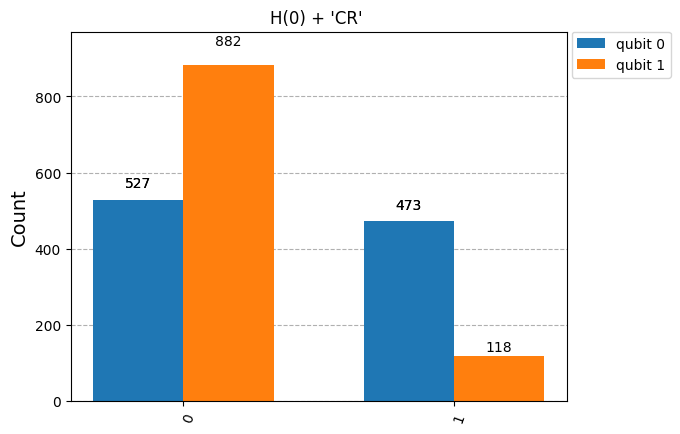

In [183]:
for i in [0,1]:
    schedules = []
    if i==0:
        with pulse.build(backend=backend) as schedule:
            with pulse.align_sequential():
                pulse.play(gauss1_sig1000, pulse.DriveChannel(0)) #transmit signal to qubits
                #pulse.play(gauss1_sig1000, pulse.DriveChannel(1))
                pulse.play(g, pulse.ControlChannel(0))
                #pulse.play(g, pulse.DriveChannel(0))
                pulse.acquire(duration=100, qubit_or_channel=0, register=pulse.MemorySlot(0)) ##Use this to measure end state
                #pulse.measure_all()
        schedules.append(schedule)
        job = backend.run(schedules, shots=1000)
        result = job.result()
        counts0=result.get_counts()
    if i==1:
        with pulse.build(backend=backend) as schedule:
            with pulse.align_sequential(): 
                pulse.play(gauss1_sig1000, pulse.DriveChannel(0)) #transmit signal to qubits
                #pulse.play(gauss1_sig1000, pulse.DriveChannel(1))
                pulse.play(g, pulse.ControlChannel(0))
                #pulse.play(g, pulse.DriveChannel(0))
                pulse.acquire(duration=100, qubit_or_channel=1, register=pulse.MemorySlot(0)) ##Use this to measure end state
                #pulse.measure_all()
        schedules.append(schedule)
        job = backend.run(schedules, shots=1000)
        result = job.result()
        counts1=result.get_counts()
plot_histogram([counts0,counts1],legend=['qubit 0', 'qubit 1'],title="H(0) + 'CR' ")

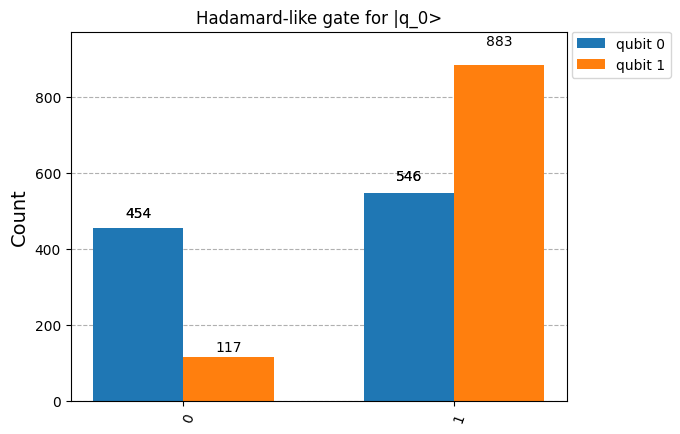

In [249]:
gauss1_sig1000=pulse.library.Gaussian(duration=6021, amp=1, sigma=504, angle=0)
for i in [0,1]:
    schedules = []
    if i==0:
        with pulse.build(backend=backend) as schedule:
            with pulse.align_sequential(): #arranges pulse schedules to be executed sequentially in time to avoid overlap. This helps
        # avoid overlap which can cause issues with coherence and unintended compilation coupling
                pulse.play(gauss1_sig1000, pulse.DriveChannel(0)) #transmit signal to qubits
                #pulse.play(gauss1_sig1000, pulse.DriveChannel(1))
                pulse.acquire(duration=100, qubit_or_channel=0, register=pulse.MemorySlot(0)) ##Use this to measure end state
                #pulse.measure_all()
        schedules.append(schedule)
        job = backend.run(schedules, shots=1000)
        result = job.result()
        counts0=result.get_counts()
    if i==1:
        with pulse.build(backend=backend) as schedule:
            with pulse.align_sequential(): #arranges pulse schedules to be executed sequentially in time to avoid overlap. This helps
        # avoid overlap which can cause issues with coherence and unintended compilation coupling
                #pulse.play(gauss1_sig1000, pulse.ControlChannel(0)) #transmit signal to qubits
                pulse.play(gauss1_sig1000, pulse.DriveChannel(1))
                pulse.acquire(duration=100, qubit_or_channel=1, register=pulse.MemorySlot(0)) ##Use this to measure end state
                #pulse.measure_all()
        schedules.append(schedule)
        job = backend.run(schedules, shots=1000)
        result = job.result()
        counts1=result.get_counts()
plot_histogram([counts0,counts1],legend=['qubit 0', 'qubit 1'],title="Hadamard-like gate for |q_0>")